## MP Option informatique - DS02 - 05/12/2020
### Corrigé v5

Alt+0156 : œ

## Exercice 1

Un arbre est un peigne si tous ses nœuds ont au moins une feuille, à l'exception éventuelle de sa racine.

In [1]:
type arbre = Feuille of int | Noeud of arbre * arbre ;;

type arbre = Feuille of int | Noeud of arbre * arbre


Un peigne est *rangé* si le fils droit d'un nœud est toujours une feuille.  
Un arbre réduit à une feuille est un peigne rangé.

### Erreur courante : 
on ne peut tester si un arbre est une feuille par `a = Feuille` ou `a = Feuille x` (sauf si $x$ est une variable entière déjà définie) ! Il faut procéder par filtrage en utilisant le motif `Feuille _`.

Si l'on veut définir une fonction qui teste si un arbre est une feuille (ce dont on peut se passer pour résoudre l'exercice) :

In [2]:
let est_feuille = function | Feuille _ -> true | _ -> false;;

val est_feuille : arbre -> bool = <fun>


In [3]:
est_feuille (Feuille 2);;

- : bool = true


In [4]:
est_feuille (Noeud (Noeud (Feuille 2, Feuille 5), Noeud(Feuille 1, Noeud( Feuille 3, Feuille 4))));;

- : bool = false


**1.** Un peigne est rangé si le fils droit d'un nœud est toujours une feuille. Si le peigne rangé doit avoir $5$ feuilles, comme tous les nœuds internes ont exactement deux fils, compte-tenu du type choisi, un arbre qui est un peigne rangé à cinq feuilles, doit donc comporter quatre nœuds internes, dont l'un est le nœud terminal et a deux fils qui sont des feuilles, les autres ayant un fils gauche qui est un nœud interne et un fils droit qui est une feuille.

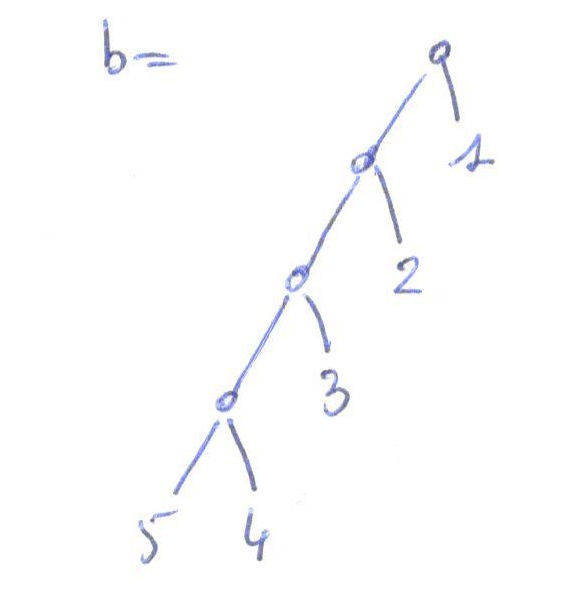

**2.** On démontre par récurrence sur le nombre $n$ de feuilles, que la hauteur d'un peigne rangé à $n$ feuilles est $n-1$.  
Pour $n=1$, un arbre réduit à une feuille est un peigne rangé. Sa hauteur est égale à $0$.  
Pour tout $n\geqslant 2$, le fils droit de la racine d'un peigne rangé à $n$ feuilles, est une feuille, de hauteur $0$ donc, tandis que le fis gauche de la racine est un peigne rangé, non vide, à $n-1$ feuilles, de hauteur $h$ supérieure ou égale à zéro, donc la hauteur de l'arbre est égale à $1+\max\left(h, 0\right)=1+h$, donc, aussi, de façon inductive, on a que la hauteur d'un peigne rangé à $n$ feuilles, $n\geqslant 2$, est égale à $1$ plus la hauteur d'un peigne rangé à $n-1$ feuilles.  
Ainsi, par récurrence, la hauteur d'un peigne rangé à $n$ feuilles, $n\geqslant 1$, est égale à $n-1$.

**3.** On écrit une fonction récursive qui vérifie si l'arbre est réduit à une feuille ou, dans le cas contraire, vérifie que le fils droit de la racine est une feuille et que son fils gauche est un peigne rangé.

In [5]:
let rec est_range a =
    match a with
        | Feuille _ -> true
        | Noeud (a1, Feuille _) -> est_range a1
        | _ -> false

(* test *)
let a = Noeud (Noeud (Feuille 2, Feuille 5), Noeud(Feuille 1, Noeud( Feuille 3, Feuille 4)));;
est_range(a)

val est_range : arbre -> bool = <fun>


val a : arbre =
  Noeud (Noeud (Feuille 2, Feuille 5),
   Noeud (Feuille 1, Noeud (Feuille 3, Feuille 4)))


- : bool = false


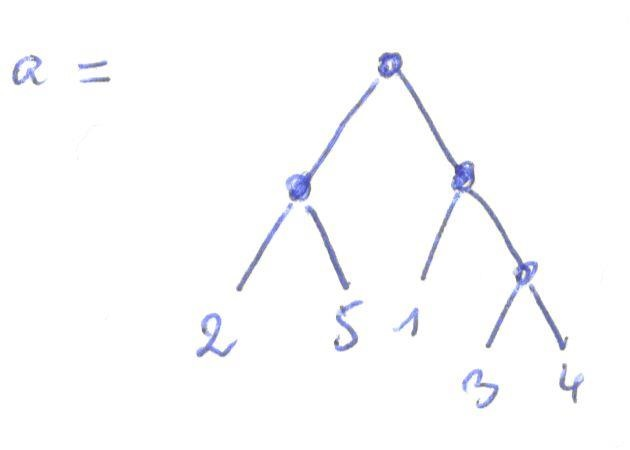

In [6]:
let b = Noeud (Noeud (Noeud (Noeud (Feuille 5, Feuille 4), Feuille 3), Feuille 2), Feuille 1);;
est_range(b)

val b : arbre =
  Noeud (Noeud (Noeud (Noeud (Feuille 5, Feuille 4), Feuille 3), Feuille 2),
   Feuille 1)


- : bool = true


**4.** Un peigne est *strict* si sa racine a au moins une feuille pour fils.  
Compte-tenu de la définition initiale selon laquelle :  
$$\text{un arbre est un peigne si tous ses noeuds, à l'exception éventuelle de sa racine, ont au moins une feuille pour fils}$$  
on en déduit qu'un arbre est un peigne strict **si $\underline{\text{tous ses noeuds}}$ ont au moins une feuille pour fils**.

On peut donc écrire une fonction récursive qui vérifie si l'arbre est réduit à une feuille ou, dans le cas contraire, vérifie que le fils droit ou le fils gauche de la racine est une feuille et que son autre fils est un peigne strict.

In [7]:
let rec est_peigne_strict a =
    match a with
        | Feuille _ -> true
        | Noeud (b, Feuille _) | Noeud (Feuille _, b) -> est_peigne_strict b
        | _ -> false;;

(* test *)
est_peigne_strict(a), est_peigne_strict(b);;

val est_peigne_strict : arbre -> bool = <fun>


- : bool * bool = (false, true)


In [8]:
let c = Noeud (Noeud (Feuille 2, Noeud (Feuille 3, Noeud (Noeud (Feuille 5, Feuille 6), Feuille 4))), Feuille 1);;
est_peigne_strict (c);;

val c : arbre =
  Noeud
   (Noeud (Feuille 2,
     Noeud (Feuille 3, Noeud (Noeud (Feuille 5, Feuille 6), Feuille 4))),
   Feuille 1)


- : bool = true


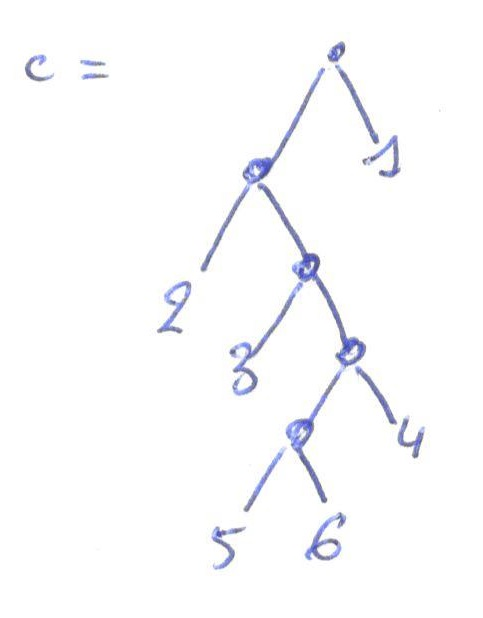

* fonction `peigne`

Compte-tenu des définitions précédentes, un arbre est un peigne, s'il est réduit à une feuille ou si ses deux fils sont des peignes stricts.   
D'où l'implémentation suivante.

In [9]:
let est_peigne a =
    match a with
        | Feuille _    -> true
        | Noeud (g, d) -> (est_peigne_strict g) && (est_peigne_strict d);;

(* test *)
est_peigne a;;

val est_peigne : arbre -> bool = <fun>


- : bool = true


**5.** Ranger un peigne (*cf.* **5.c.**) consiste à transformer un peigne en un peigne rangé dont les feuilles sont les mêmes que celles du peigne d'origine.  
Pour cela, on opère récursivement, en traitant d'abord la racine, puis en rangeant les fils de la racine.  
Au niveau de la racine, on peut distinguer deux cas :  
* le peigne est rangé si le fils droit de la racine est une feuille. Comme le fils gauche est, d'après la définition d'un peigne, est nécessairement un peigne strict, il reste alors uniquement à ranger le fils gauche de la racine qui est un peigne strict ;   
* si ce n'est pas le cas, d'après la définition d'un peigne, il est assuré que les fils droit et gauche de la racine sont  des peignes stricts et l'on est nécessairement dans la situation décrite dans la présentation de l'opération de rotation.  
L'opération de rotation laisse invariant l'ensemble des feuilles et la propriété selon laquelle les fils droit et gauche de la racine sont des peignes stricts,et de plus assure que la hauteur du fils droit de la racine diminue de $1$.  
Ainsi, il est assuré qu'en itérant l'opération de rotation sur la racine d'un peigne jusqu'à ce que son fils droit soit de hauteur zéro (*i.e.* un peigne réduit à une feuille), on obtient à terme un peigne strict dont le fils droit de la racine est une feuille.  
Il reste alors à ranger le fils gauche de la racine qui est un peigne strict.  
  
De plus, si l'on commence par ranger le fils gauche de la racine avant de commencer à appliquer les rotations, l'opération de rotation laissant invariante le caractère rangé du fils gauche de la racine, l'application des rotations jusqu'à ce que le fils droit de la racine soit une feuille produit directement un peigne rangé.

**5.a.** Si l'on applique une fois l'opération de rotation sur l'arbre de la figure 1, on obtient le résultat suivant :

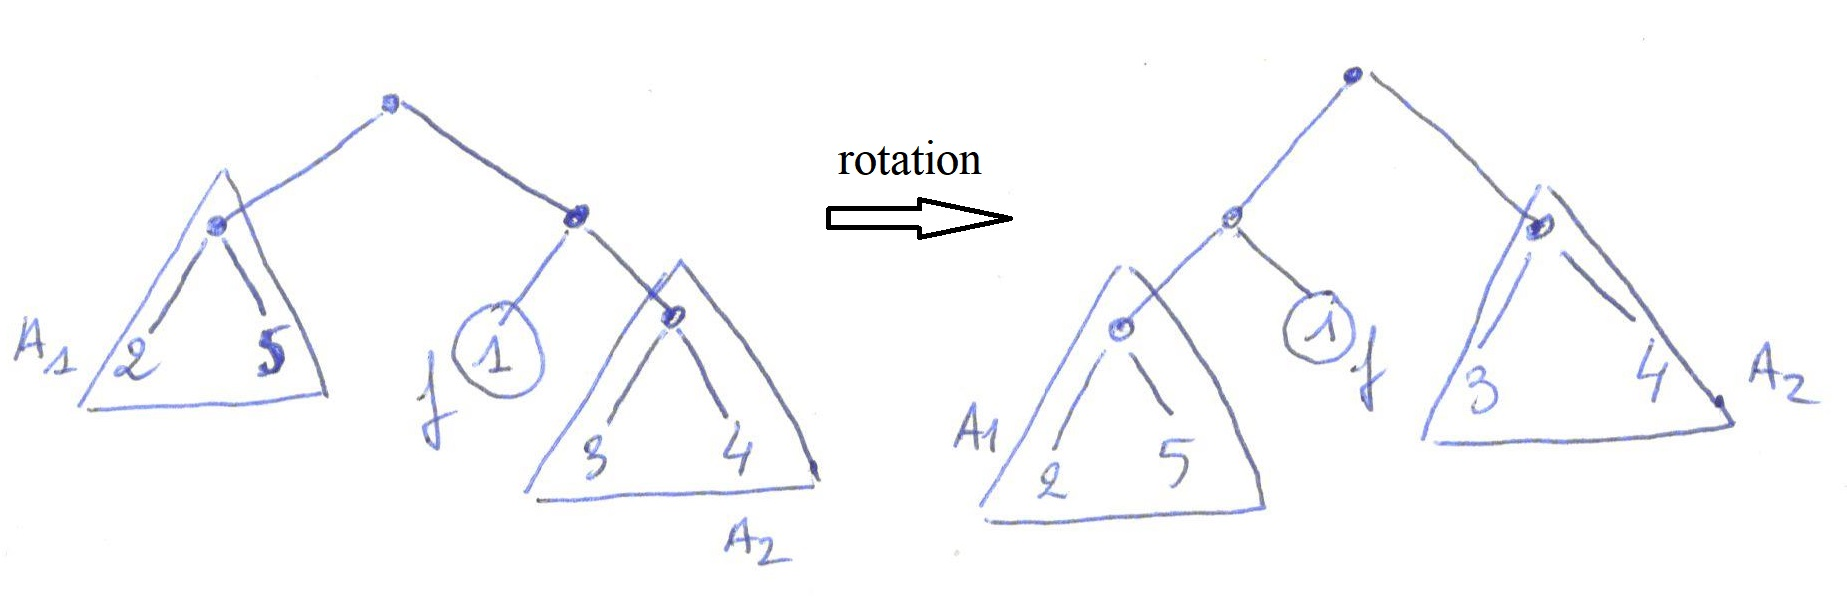

Cela n'est pas demandé, mais si l'on applique une deuxième opération de rotation sur l'arbre obtenu, on obtient un peigne rangé :

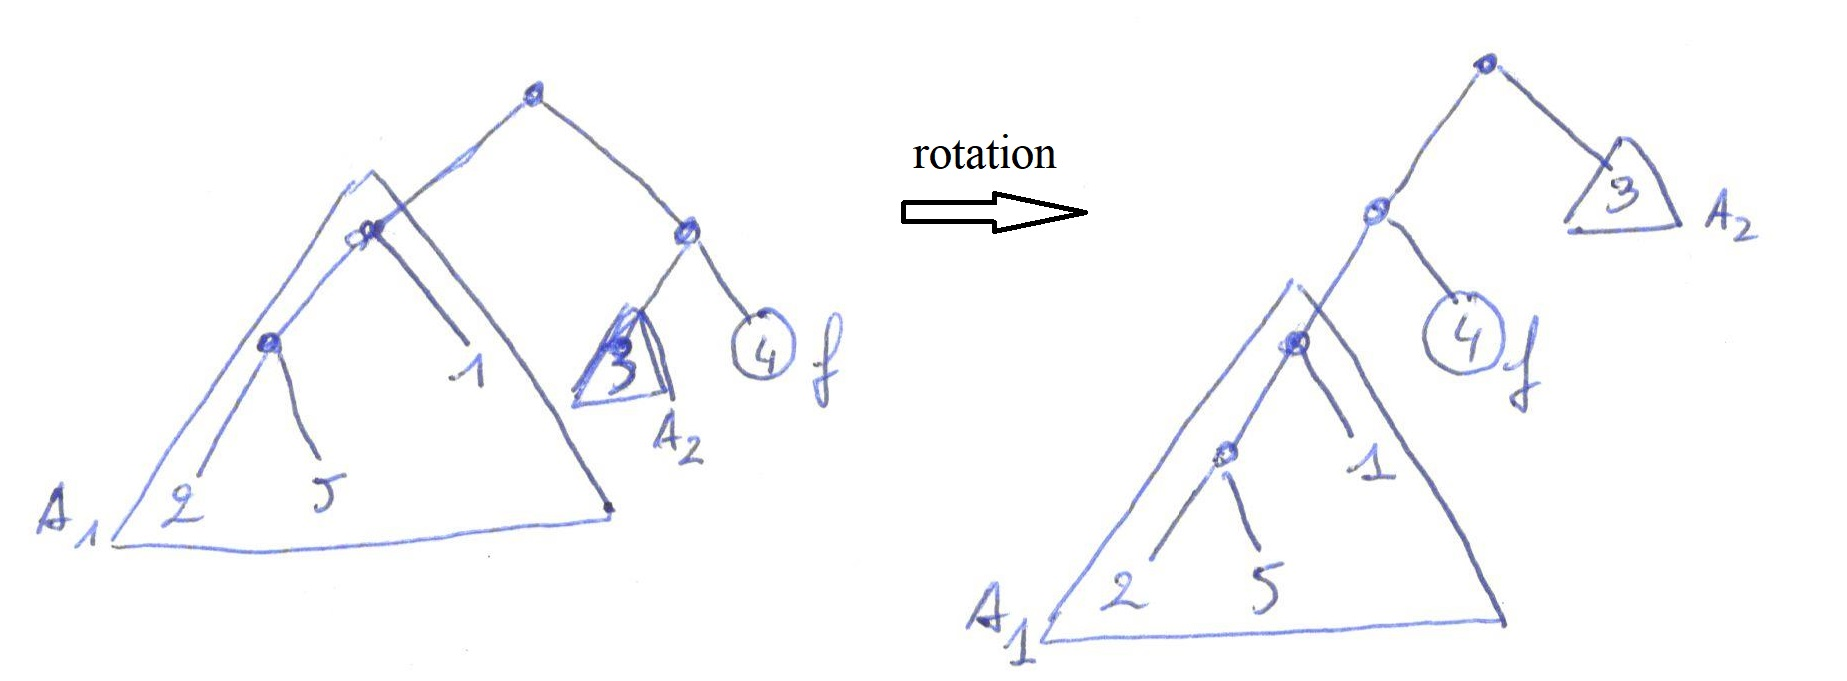

**5.b.** Une rotation est possible si et seulement si le fils droit de la racine est un noeud admettant au moins une feuille pour fils, d'où l'implémentation suivante.

In [10]:
let rotation a =
    match a with
        | Noeud (a1, Noeud (a2, Feuille f))
        | Noeud (a1, Noeud (Feuille f, a2)) -> Noeud (Noeud (a1, Feuille f), a2)
        | _ -> a;;

val rotation : arbre -> arbre = <fun>


In [11]:
(* test *)

In [12]:
rotation a;;

- : arbre =
Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1),
 Noeud (Feuille 3, Feuille 4))


Si on applique deux fois l'opération de rotation :

In [13]:
rotation (rotation a);;

- : arbre =
Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 4),
 Feuille 3)


**5.c.**

Afin de ne pas modifier l'arbre donné en argument au cas où l'arbre n'est pas un peigne, on commencera par tester si l'arbre en argument est un peigne.  
Lorsque l'arbre en argument est un peigne, suivant l'analyse préliminaire donnée au début de la question **5**, on peut, pour le ranger :  
* soit commencer par ranger le fils gauche de la racine, qui est un peigne strict, puis itérer l'opération de rotation au fils droit de la racine jusqu'à ce que ce fils droit soit une feuille ;  
* soit d'abord itérer l'opération de rotation au fils droit de la racine jusqu'à ce que ce fils droit soit une feuille, puis ranger le fils gauche de la racine, qui reste un peigne strict au fil des applications de l'opération de rotation.  

Comme l'opération de rotation appliquée à un peigne non strict créé des nœuds dans l'arbre gauche qui ont déjà leur feuille placée à droite, afin de ne pas traiter inutilement deux fois ces nœuds, on commencera par traiter le sous-arbre gauche du peigne.

Ranger un peigne strict peut se résumer à :  
* échanger ses fils droit et gauche dans le cas où son fils gauche est une feuille ;  
* puis à ranger son sous-arbre gauche.  

La fonction auxiliaire suivante réalise cette opération.

In [14]:
let rec aux_strict a = 
    match a with
        | Noeud (Feuille x, d) -> Noeud (aux_strict d, Feuille x)
        | Noeud (g, Feuille x) -> Noeud (aux_strict g, Feuille x)
        | _                    -> a;;

val aux_strict : arbre -> arbre = <fun>


In [15]:
(* test *)
aux_strict c;;

- : arbre =
Noeud
 (Noeud (Noeud (Noeud (Noeud (Feuille 6, Feuille 5), Feuille 4), Feuille 3),
   Feuille 2),
 Feuille 1)


*Remarque :* Dans les deux cas, pour ranger le fils gauche de la racine, on peut observer que l'application itérée de la fonction de rotation au fils gauche de la racine convient.  
En effet, si on applique la fonction de rotation a un peigne strict :  
* si le fils droit de la racine est une feuille, la fonction laisse la racine inchangée. Il reste alors à ranger le fils gauche de la racine qui est un peigne strict ; 
* si le fils droit de la racine est un nœud, alors la fonction de rotation bascule la feuille de ce nœud sur le fils gauche de la racine en faisant de ce fils gauche un peigne rangé ; il reste alors à appliquer l'opération de rotation au fils droit de la racine. 

On met en oeuvre cette méthode ci-dessous, en fin d'exercice.

### fonction `rangement` :

Comme annoncé précédemment, on commence par tester si l'arbre en argument est un peigne, puis on range son sous-arbre gauche. Enfin, on applique l'opération de rotation, jusqu'à ce que son sous-arbre droit soit une feuille.  

On définit une fonction auxiliaire `aux_rot` appliquant l'opération de rotation jusqu'à ce que le sous-arbre droit soit une feuille :

In [16]:
let rec aux_rot a =
    match a with
        | Feuille _ | Noeud (_, Feuille _) -> a
        | _ -> aux_rot (rotation a);;

val aux_rot : arbre -> arbre = <fun>


In [17]:
(* test *)
aux_rot a;;

- : arbre =
Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 4),
 Feuille 3)


On peut alors définir la fonction `rangement` :

In [18]:
let rangement a =
    if not (est_peigne a) then a
    else
        match a with
            | Feuille _ -> a
            | Noeud (g, d) -> let a1 = Noeud (aux_strict g, d)
                              in
                              aux_rot a1;;

(* test *)
rangement a;;

val rangement : arbre -> arbre = <fun>


- : arbre =
Noeud (Noeud (Noeud (Noeud (Feuille 5, Feuille 2), Feuille 1), Feuille 4),
 Feuille 3)


In [19]:
rangement c;;

- : arbre =
Noeud
 (Noeud (Noeud (Noeud (Noeud (Feuille 6, Feuille 5), Feuille 4), Feuille 3),
   Feuille 2),
 Feuille 1)


In [20]:
let d = Noeud (Feuille 1,
               Noeud (Noeud (Noeud (Feuille 4,
                                    Noeud (Feuille 5,
                                           Feuille 6)
                                    ), 
                             Feuille 3
                             ),
                       Feuille 2
                       )
               );;
est_range(d), est_peigne(d);;

val d : arbre =
  Noeud (Feuille 1,
   Noeud (Noeud (Noeud (Feuille 4, Noeud (Feuille 5, Feuille 6)), Feuille 3),
    Feuille 2))


- : bool * bool = (false, true)


In [21]:
rangement d;;

- : arbre =
Noeud
 (Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4),
   Feuille 6),
 Feuille 5)


### méthode alternative (plus élégante) :

In [22]:
let rec ranger a =
    match a with 
        | Feuille _ -> a
        | Noeud (a1, Feuille f) -> Noeud (ranger a1, Feuille f)
        | _                     -> ranger (rotation a);;

val ranger : arbre -> arbre = <fun>


In [23]:
let rangement2 a = if est_peigne a then ranger a else a;;

val rangement2 : arbre -> arbre = <fun>


In [24]:
(* tests *)
rangement2 a;;

- : arbre =
Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 5), Feuille 1), Feuille 4),
 Feuille 3)


In [25]:
rangement2 b;;

- : arbre =
Noeud (Noeud (Noeud (Noeud (Feuille 5, Feuille 4), Feuille 3), Feuille 2),
 Feuille 1)


In [26]:
rangement2 c;;

- : arbre =
Noeud
 (Noeud (Noeud (Noeud (Noeud (Feuille 2, Feuille 3), Feuille 4), Feuille 6),
   Feuille 5),
 Feuille 1)


In [27]:
rangement2 d;;

- : arbre =
Noeud
 (Noeud (Noeud (Noeud (Noeud (Feuille 1, Feuille 2), Feuille 3), Feuille 4),
   Feuille 6),
 Feuille 5)


## Exercice 2

In [28]:
type arbre = Fromage of int | N of arbre * arbre * float;;

type arbre = Fromage of int | N of arbre * arbre * float


https://www.math.u-bordeaux.fr/~arichou/site/projets2019/Couvidat-Dalmasie/Couvidat-Dalmasie.html  
https://www.data.gouv.fr/fr/datasets/table-de-composition-nutritionnelle-des-aliments-ciqual/

On se donne une matrice-exemple `fromages`, comportant la description de six *fromages* au travers de deux mesures associée à chacun.

In [29]:
let fromages = [| [| 1.; 2. |];
                  [| 0.; 0. |];
                  [| 3.; 2. |];
                  [| 10.; 5.|];
                  [| 2.; 1. |];
                  [| 4.; 7. |] |];;

val fromages : float array array =
  [|[|1.; 2.|]; [|0.; 0.|]; [|3.; 2.|]; [|10.; 5.|]; [|2.; 1.|]; [|4.; 7.|]|]


et une tableau-exemple `pondération` :

In [30]:
let ponderation = [| 1.; 1. |]

val ponderation : float array = [|1.; 1.|]


In [31]:
abs_float 1., 1. ** 2., min 1. 2.;;

- : float * float * float = (1., 1., 1.)


In [32]:
abs;;

- : int -> int = <fun>


In [33]:
abs_float;;

- : float -> float = <fun>


**1.** Fonction de calcul de la distance entre deux fromages d'indices $i$ et $j$

In [34]:
let distance i j = 
    let d = ref 0. in
    for k = 0 to Array.length ponderation - 1 do
        d := !d +. ponderation.(k) *. abs_float (fromages.(i).(k) -. fromages.(j).(k))
    done;
    !d;;

val distance : int -> int -> float = <fun>


In [35]:
distance 0 1;;

- : float = 3.


* représentation graphique des *fromages* de l'exemple :

**2**

### Erreur à éviter :

Pour définir une matrice de taille $(n, m)$, initialement remplie de valeurs identiques, on peut utiliser la fonction `make_matrix` du module `Array` :

In [36]:
let n, m, valeur = 2, 3, 0;;
let mat = Array.make_matrix n m valeur;;

val n : int = 2
val m : int = 3
val valeur : int = 0


val mat : int array array = [|[|0; 0; 0|]; [|0; 0; 0|]|]


ou construire un tableau de dimension $n$ dont chaque cellule contient une référence à un tableau de $m$ valeurs identiques.  
Mais dans cette deuxième façon de faire il faut veiller à créer $n$ tableaux de taille $m$ distincts !  
Aussi, ce qui suit ne convient pas :

In [37]:
let n, m, valeur = 2, 3, 0;;
let mat0 = Array.make n (Array.make m valeur);;

val n : int = 2
val m : int = 3
val valeur : int = 0


val mat0 : int array array = [|[|0; 0; 0|]; [|0; 0; 0|]|]


car on a enregistré deux références à un même tableau au lieu d'en créer deux distincts comme on le voit en changeant une valeur :

In [38]:
mat0.(0).(0) <- 1;;
mat0;;

- : unit = ()


- : int array array = [|[|1; 0; 0|]; [|1; 0; 0|]|]


Il faut avec cette méthode, créer explicitement $n$ tableaux de taille $m$ à l'aide d'une boucle, ou faire $n$ copies d'un même tableau de taille $m$ :

In [39]:
let n, m, valeur = 2, 3, 0;;
let mat1 = let mat = Array.make n (Array.make m valeur) in
           for i = 1 to n - 1 do
               mat.(i) <- Array.copy mat.(0)
           done;
           mat;;

val n : int = 2
val m : int = 3
val valeur : int = 0


val mat1 : int array array = [|[|0; 0; 0|]; [|0; 0; 0|]|]


In [40]:
(* on constate que le problème est corrigé *)
mat1.(0).(0) <- 1;;
mat1;;

- : unit = ()


- : int array array = [|[|1; 0; 0|]; [|0; 0; 0|]|]


ou bien, par exemple encore :

In [41]:
let n, m, valeur = 2, 3, 0;;
let mat2 =
    let t = ref [||] in
    for i = 0 to n - 1 do
        t := Array.append !t [|Array.make m valeur|]
    done;
    !t;;
mat2;;

val n : int = 2
val m : int = 3
val valeur : int = 0


val mat2 : int array array = [|[|0; 0; 0|]; [|0; 0; 0|]|]


- : int array array = [|[|0; 0; 0|]; [|0; 0; 0|]|]


In [42]:
(* on constate que le problème est corrigé *)
mat2.(0).(0) <- 1;;
mat2;;

- : unit = ()


- : int array array = [|[|1; 0; 0|]; [|0; 0; 0|]|]


### fonction `distance` :

In [43]:
let dist =
    let n = Array.length fromages
    in
    let m = Array.make_matrix n n 0.
    in
    for i = 0 to n - 1 do
        for j = 0 to n - 1 do
            m.(i).(j) <- distance i j
        done
    done;
    m;;

val dist : float array array =
  [|[|0.; 3.; 2.; 12.; 2.; 8.|]; [|3.; 0.; 5.; 15.; 3.; 11.|];
    [|2.; 5.; 0.; 10.; 2.; 6.|]; [|12.; 15.; 10.; 0.; 12.; 8.|];
    [|2.; 3.; 2.; 12.; 0.; 8.|]; [|8.; 11.; 6.; 8.; 8.; 0.|]|]


Pour profiter du fait que la matrice est symétrique (et gagner un facteur 2 sur les appels à `distance`) :

In [44]:
let dist =
    let n = Array.length fromages
    in
    let m = Array.make_matrix n n 0.
    in
    for i = 0 to n - 1 do
        for j = 0 to i - 1 do
            m.(i).(j) <- m.(j).(i)
        done;
        for j = i to n - 1 do
            m.(i).(j) <- distance i j
        done
    done;
    m;;

val dist : float array array =
  [|[|0.; 3.; 2.; 12.; 2.; 8.|]; [|3.; 0.; 5.; 15.; 3.; 11.|];
    [|2.; 5.; 0.; 10.; 2.; 6.|]; [|12.; 15.; 10.; 0.; 12.; 8.|];
    [|2.; 3.; 2.; 12.; 0.; 8.|]; [|8.; 11.; 6.; 8.; 8.; 0.|]|]


**3**

Il s'agit de déterminer le minimum de la distance entre deux fromages appartenant respectivement à deux arbres $A$ et $B$.

On va calculer récursivement la distance entre les arbres $A$ et $B$.  
La fonction `dist_arbr` prend en argument deux arbres et compte_tenu du type `arbre` utilisé, on peut utiliser un filtrage exhaustif distinguant si chacun des deux arbres est réduit à une feuille ou non.  
Dans ce filtrage, le cas de base est celui où les deux arbres sont réduits à une feuille : dans ce cas, la distance entre les deux arbres est la distance entre les deux fromages qui les composent.  
Les autres cas se traitent en calculant un minimum entre les distances calculées à l'aide d'appels récursifs.

In [127]:
let rec dist_arbr a1 a2 =
    match a1, a2 with
        | Fromage i, Fromage j            -> dist.(i).(j)
        | Fromage i, N (g, d, _)
        | N (g, d, _), Fromage i          -> min (dist_arbr (Fromage i) g) (dist_arbr (Fromage i) d)
        | N (g1, d1, _), N (g2, d2, _)    -> let min1 = min (dist_arbr g1 g2) (dist_arbres g1 d2)
                                             and min2 = min (dist_arbr d1 g2) (dist_arbres d1 d2)
                                             in
                                             min min1 min2;;

val dist_arbr : arbre -> arbre -> float = <fun>


In [128]:
(* test *)
dist_arbr (N (Fromage 0, Fromage 1, 0.)) (N (N (Fromage 2, Fromage 3, 0.), Fromage 4, 0.));;
dist_arbr (N (Fromage 5, Fromage 3, 0.)) (N (Fromage 2, N (N (Fromage 0, Fromage 1, 0.), Fromage 4, 0.), 0.));;

- : float = 2.


- : float = 2.


ou bien, pour alléger les écritures :

In [129]:
let rec dist_arbr a1 a2 =
    match a1, a2 with
        | Fromage i, Fromage j         -> dist.(i).(j)
        | Fromage _, N (g, d, _)       -> min (dist_arbr a1 g) (dist_arbr a1 d)
        | N (g, d, _), Fromage _       -> min (dist_arbres g a2) (dist_arbr d a2)
        | N (g1, d1, _), N (g2, d2, _) -> let min1 = min (dist_arbr g1 g2) (dist_arbr g1 d2)
                                          and min2 = min (dist_arbres d1 g2) (dist_arbr d1 d2)
                                          in
                                          min min1 min2;;

val dist_arbr : arbre -> arbre -> float = <fun>


In [130]:
(* test *)
dist_arbr (N (Fromage 0, Fromage 1, 0.)) (N (N (Fromage 2, Fromage 3, 0.), Fromage 4, 0.));;
dist_arbr (N (Fromage 5, Fromage 3, 0.)) (N (Fromage 2, N (N (Fromage 0, Fromage 1, 0.), Fromage 4, 0.), 0.));;

- : float = 2.


- : float = 2.


### Méthode alternative

On parcourt $a$ et pour toute feuille $f_a$ de $a$, correspondant à une fromage $i$ :
- on parcourt $b$ et pour toute feuille $f_b$ de $b$, correspondant à un fromage $j$, on actualise la valeur du minimum en examinant la valeur de `dist.(i).(j)`

On se donne une fonction d'actualisation de la distance minimum trouvée

In [131]:
let maj_min dmin i j = dmin := min !dmin dist.(i).(j);;

val maj_min : float ref -> int -> int -> unit = <fun>


On se donne une fonction de parcours en profondeur d'un arbre du type donné dans l'énoncé (il n'y a pas à distinguer entre parcours préfixe, infixe, postfixe - ou suffixe, car on n'applique pas de traitement aux nœuds internes mais seulement aux feuilles)

In [132]:
let rec parcours a f =
    match a with
        | Fromage k   -> f k
        | N (g, d, _) -> parcours g f;
                         parcours d f;;

val parcours : arbre -> (int -> 'a) -> 'a = <fun>


Lors du parcours de l'arbre $a_1$, le traitement à appliquer pour chaque feuille $f_a$ de $a$ consiste à parcourir l'arbre $a_2$ pour y calculer pour chaque feuille $f_{a_2}$ la distance de $f_{a_1}$ à $f_{a_2}$, la fonction à appliquer est donc `maj_min dmin i`.

Pour une feuille $f_1$ de $a_1$, correspondant à un fromage $i$, lors du parcours de l'arbre $a_2$, le traitement à appliquer pour chaque feuille $f_2$ de $a_2$, correspondant à un fromage $j$, consiste à calculer la distance de $i$ à $j$, la fonction à appliquer à $j$ est donc `maj_min dmin i`.  
Lors du parcours de $a_1$, pour chaque feuille $f_1$, correspondant à un fromage $i$,
le traitement à appliquer consiste à parcourir $a_2$, en appliquant `maj_min dmin i`, la fonction à appliquer est donc
`parcours b (maj_min dmin i)`. 

On utilise la valeur flottante *infinie* positive `infinity` pour initialiser le minimum de la fonction `dist_arbr` :

In [133]:
infinity;;
10.**200.< infinity;;

- : float = infinity


- : bool = true


 D'où l'implémentation suivante de la fonction `dist_arbr`.

In [134]:
let dist_arbr a b = 
    let dmin = ref infinity in
    let f vmin i = parcours b (maj_min vmin i)
    in
    parcours a (f dmin);
    !dmin;

val dist_arbr : arbre -> arbre -> float = <fun>


In [135]:
(* test *)

dist_arbr (N (Fromage 0, Fromage 1, 0.)) (N (N (Fromage 2, Fromage 3, 0.), Fromage 4, 0.));;
dist_arbr (N (Fromage 5, Fromage 3, 0.)) (N (Fromage 2, N (N (Fromage 0, Fromage 1, 0.), Fromage 4, 0.), 0.));;

- : float = 2.


- : float = 2.


**4**

Commençons par implémenter le premier point *a.*, en créant la forêt initiale :

In [136]:
let dendogramme0 () =
    let foret = ref [] in
    for k = 0 to Array.length fromages - 1 do
        foret := Fromage k::!foret
    done;
    !foret;;

val dendogramme0 : unit -> arbre list = <fun>


In [137]:
dendogramme0 ();;

- : arbre list =
[Fromage 5; Fromage 4; Fromage 3; Fromage 2; Fromage 1; Fromage 0]


Il s'agit ensuite de trouver le minimum de distance entre deux éléments distincts d'une liste et les deux éléments qui réalisant ce minimum.  

#### recherche des deux éléments distincts d'une liste réalisant la plus petite distance entre deux éléments de cette liste

Considérons une liste `lst` non vide, notée `h::t`.  
Le minimum de la distance entre deux éléments distincts de `lst` peut être calculé comme le minimum entre  
* le minimum de la distance entre `h` et les éléments de `t` et 
* le minimum de la distance entre deux éléments distincts de `t`.

Si l'on dispose d'une fonction calculant le minimum de la distance entre une valeur et les éléments d'une liste, on peut donner une implémentation récursive de la fonction calculant le minimum entre deux éléments distincts d'une liste.  
  
Pour résoudre l'exercice, il sera utile de déterminer chaque fois, non seulement le minimum, mais aussi les éléments qui le réalisent.

* fonction `min1` renvoyant le minimum de distance entre une valeur `x` et un élément d'une liste `lst` pour une fonction de distance `fdist`, et renvoyant aussi, afin de préparer la fin de l'exercice, l'élément de `lst` réalisant ce minimum, ainsi que le reste de la liste (liste privé de l'élément avec lequel le minimum est réalisé).

In [138]:
let rec min1 fdist x lst  =
    match lst with 
        | [] -> failwith "liste vide"
        | [y] -> fdist x y, y, []
        | h::t -> let dmint, y, t' = min1 fdist x t (* dmin_t : minimum de distance entre x et le reste
        de la liste,
                                            réalisé par y (dmin_t = fdist x y) *)
                  and dminh = fdist x h in      (* distance entre x et la tête de la liste *)
                  if dmint < dminh then dmint, y, h::t' else dminh, h, t;;

val min1 : ('a -> 'b -> 'c) -> 'a -> 'b list -> 'c * 'b * 'b list = <fun>


In [139]:
min1 (fun x y -> abs (x - y)) 5 [1; 2; -1];;

- : int * int * int list = (3, 2, [1; -1])


In [140]:
min1 dist_arbr (Fromage 0) [Fromage 5; Fromage 4; Fromage 3; Fromage 2; Fromage 1];;

- : float * arbre * arbre list =
(2., Fromage 3, [Fromage 5; Fromage 4; Fromage 2; Fromage 1])


On peut maintenant donner une implémentation récursive d'une fonction `min2` renvoyant la distance minimale entre deux éléments d'une liste `lst` ainsi que les deux éléments réalisant ce minimum.  
Afin de préparer la fin de l'exercice, la fonction renverra également la liste des éléments de `lst` autres que les éléments réalisant le minimum.

In [141]:
let rec min2 fdist lst =
    match lst with
        | [] | [_] -> failwith "la liste comporte moins de deux elements"
        | x1::[x2] -> fdist x1 x2, x1, x2, []
        | x::t -> let dmin1, x3, t' = min1 fdist x t
                  and dmin2, x1, x2, t'' = min2 fdist t
                  (* dmin :
                  minimum de distance entre deux éléments de t ;
                                            x1, x2 : éléments réalisant le minimum ; t' : reste de la liste *)
                  in
                  if dmin2 < dmin1 then
                      dmin2, x1, x2, x::t''
                  else
                      dmin1,  x, x3, t';;

val min2 : ('a -> 'a -> 'b) -> 'a list -> 'b * 'a * 'a * 'a list = <fun>


In [142]:
min2 (fun x y -> abs (x - y)) [1; 2; -1; 5];;

- : int * int * int * int list = (1, 1, 2, [-1; 5])


In [143]:
min2 dist_arbr [Fromage 5; Fromage 4; Fromage 3; Fromage 2; Fromage 1; Fromage 0];;

- : float * arbre * arbre * arbre list =
(2., Fromage 4, Fromage 2, [Fromage 5; Fromage 3; Fromage 1; Fromage 0])


On peut alors terminer l'écriture de la fonction `dendogramme` :

In [144]:
let dendogramme () =
    let n = Array.length fromages in
    let foret = ref [] in
    for k = 0 to n - 1 do
        foret := Fromage k::!foret
    done;
    let k = ref n in
    while !k > 1 do
        let dmin, a1, a2, restants = min2 dist_arbr !foret
        in
        foret := N (a1, a2, dmin)::restants;
        decr k
    done;
    List.hd !foret;;

val dendogramme : unit -> arbre = <fun>


In [145]:
dendogramme();;

- : arbre =
N (N (N (Fromage 4, Fromage 2, 2.), Fromage 1, 3.),
 N (N (Fromage 3, Fromage 0, 2.), Fromage 5, 3.), 5.)


### Exemple 2

In [146]:
let fromages = [| [| 5.; 5. |];
                  [| 0.; 0. |];
                  [| 3.; 2. |];
                  [| 6.; 6.|];
                  [| 2.; 1. |];
                  [| 4.; 7. |] |];;

val fromages : float array array =
  [|[|5.; 5.|]; [|0.; 0.|]; [|3.; 2.|]; [|6.; 6.|]; [|2.; 1.|]; [|4.; 7.|]|]


In [147]:
let ponderation = [| 1.; 1. |]

val ponderation : float array = [|1.; 1.|]


In [148]:
let distance i j = 
    let d = ref 0. in
    for k = 0 to Array.length ponderation - 1 do
        d := !d +. ponderation.(k) *. abs_float (fromages.(i).(k) -. fromages.(j).(k))
    done;
    !d;;

val distance : int -> int -> float = <fun>


In [149]:
let dist =
    let n = Array.length fromages
    in
    let m = Array.make_matrix n n 0.
    in
    for i = 0 to n - 1 do
        for j = 0 to n - 1 do
            m.(i).(j) <- distance i j
        done
    done;
    m;;

val dist : float array array =
  [|[|0.; 10.; 5.; 2.; 7.; 3.|]; [|10.; 0.; 5.; 12.; 3.; 11.|];
    [|5.; 5.; 0.; 7.; 2.; 6.|]; [|2.; 12.; 7.; 0.; 9.; 3.|];
    [|7.; 3.; 2.; 9.; 0.; 8.|]; [|3.; 11.; 6.; 3.; 8.; 0.|]|]


In [150]:
let rec dist_arbres a1 a2 =
    match a1, a2 with
        | Fromage i, Fromage j         -> dist.(i).(j)
        | Fromage _, N (g, d, _)       -> min (dist_arbres a1 g) (dist_arbres a1 d)
        | N (g, d, _), Fromage _       -> min (dist_arbres g a2) (dist_arbres d a2)
        | N (g1, d1, _), N (g2, d2, _) -> let min1 = min (dist_arbres g1 g2) (dist_arbres g1 d2)
                                          and min2 = min (dist_arbres d1 g2) (dist_arbres d1 d2)
                                          in
                                          min min1 min2;;

val dist_arbres : arbre -> arbre -> float = <fun>


In [151]:
let dendogramme () =
    let n = Array.length fromages in
    let foret = ref [] in
    for k = 0 to n - 1 do
        foret := Fromage k::!foret
    done;
    let k = ref n in
    while !k > 1 do
        let dmin, a1, a2, restants = min2 dist_arbr !foret
        in
        foret := N (a1, a2, dmin)::restants;
        decr k
    done;
    List.hd !foret;;

val dendogramme : unit -> arbre = <fun>


In [152]:
dendogramme();;

- : arbre =
N (N (N (Fromage 4, Fromage 2, 2.), Fromage 1, 3.),
 N (N (Fromage 3, Fromage 0, 2.), Fromage 5, 3.), 5.)


On peut ensuite se donner une fonction `min_lst`, calculant la plus petite distance entre deux éléments d'une liste, renvoyant ce minimum ainsi que les deux éléments réalisant ce minimum.  
On utilise pour cela deux références, `dmin` et `cmin`, pour stocker la valeur minimale obtenue ainsi que le couple d'arbres réalisant ce minimum.

On commence alors par se donner une fonction calculant la distance minimale d'une valeur aux valeurs d'une liste :

In [153]:
let rec min_to_list distance x lst =
    match lst with
        | []   -> failwith "liste vide"
        | [y]  -> distance x y, y
        | y::t -> let d, z = min_to_list distance x t and dxy = distance x y in
                  if dxy < d then dxy, y else d, z

val min_to_list : ('a -> 'b -> 'c) -> 'a -> 'b list -> 'c * 'b = <fun>


In [154]:
min_to_list (fun x y -> abs (x - y)) 5 [1; 2; -1];;

- : int * int = (3, 2)


In [155]:
min_to_list dist_arbr (Fromage 0) [Fromage 5; Fromage 4; Fromage 3; Fromage 2; Fromage 1];;

- : float * arbre = (2., Fromage 3)


puis une fonction calculant le minimum entre deux éléments distincts d'une liste contenant au moins deux éléments, faisant appel à la fonction précédente :

In [156]:
let rec min2_list distance lst =
    match lst with
        | [] |[_]    -> failwith "la liste comporte moins de deux éléments"
        | x::y::[] -> distance x y, (x, y)
        | x::t       -> let dmin, cmin = min2_list distance t
                        and d, y = min_to_list distance x t in
                        if d < dmin then d, (x, y) else dmin, cmin;;

val min2_list : ('a -> 'a -> 'b) -> 'a list -> 'b * ('a * 'a) = <fun>


In [157]:
min2_list (fun x y -> abs (x - y)) [1; 5; 2; -1];;
min2_list (fun x y -> abs (x - y)) [1; 5; 10; -1];;

- : int * (int * int) = (1, (1, 2))


- : int * (int * int) = (2, (1, -1))


In [158]:
min2_list dist_arbr [Fromage 5; Fromage 4; Fromage 3; Fromage 2; Fromage 1; Fromage 0];;

- : float * (arbre * arbre) = (2., (Fromage 3, Fromage 0))


On se donne enfin une fonction retirant deux valeurs x et y d'une liste lst dont les éléments sont supposés distincts, en accumulant dans une liste acc les éléments de lst distincts de x et de y.

In [159]:
let rec retire x y lst acc =
    match lst with
        | [] -> acc
        | h::t -> if h = x || h = y then retire x y t acc else retire x y t (h::acc);;

val retire : 'a -> 'a -> 'a list -> 'a list -> 'a list = <fun>


In [160]:
retire 0 1 [2; 0; 3; 5; 1] [];;

- : int list = [5; 3; 2]


Reste à écrire la fonction de fusion de deux arbres a et b éloignés d'une distance d :

In [161]:
let fusion a b d = N (a, b, d)

val fusion : arbre -> arbre -> float -> arbre = <fun>


On peut alors compléter la fonction `dendogramme` par une boucle `while` dans laquelle on recherche le minimum de la distance entre deux arbres de la forêt, pour ensuite retirer les deux arbres réalisant le minimum pour les fusionner ensuite puis rajouter l'arbre résultant à la forêt, jusqu'à ce que la forêt ne contienne plus qu'un arbre.

In [162]:
let dendogramme () =
    let foret = ref [] in
    for k = 0 to Array.length fromages - 1 do
        foret := Fromage k::!foret
    done;
    while List.tl !foret <> [] do
        let d, (a, b) = min2_list dist_arbr !foret
        in
        let autres = retire a b !foret []
        in
        foret := (fusion a b d)::autres
    done;
    !foret;;

val dendogramme : unit -> arbre list = <fun>


In [163]:
dendogramme ();;

- : arbre list =
[N (N (Fromage 1, N (Fromage 2, Fromage 4, 2.), 3.),
  N (Fromage 5, N (Fromage 3, Fromage 0, 2.), 3.), 5.)]


In [164]:
dist_arbr (N (Fromage 2, Fromage 0, 2.)) (Fromage 1);;
dist_arbr (N (Fromage 2, Fromage 0, 2.)) (Fromage 3);;
dist_arbr (N (Fromage 2, Fromage 0, 2.)) (Fromage 5);;

- : float = 5.


- : float = 2.


- : float = 3.


In [165]:
let fromages = [| [| 5.; 5. |];
                  [| 0.; 0. |];
                  [| 3.; 2. |];
                  [| 6.; 6.|];
                  [| 2.; 1. |];
                  [| 4.; 7. |] |];;

val fromages : float array array =
  [|[|5.; 5.|]; [|0.; 0.|]; [|3.; 2.|]; [|6.; 6.|]; [|2.; 1.|]; [|4.; 7.|]|]


In [166]:
let distance i j = 
    let d = ref 0. in
    for k = 0 to Array.length ponderation - 1 do
        d := !d +. ponderation.(k) *. abs_float (fromages.(i).(k) -. fromages.(j).(k))
    done;
    !d;;

val distance : int -> int -> float = <fun>


In [167]:
let dist =
    let n = Array.length fromages
    in
    let m = Array.make_matrix n n 0.
    in
    for i = 0 to n - 1 do
        for j = 0 to n - 1 do
            m.(i).(j) <- distance i j
        done
    done;
    m;;

val dist : float array array =
  [|[|0.; 10.; 5.; 2.; 7.; 3.|]; [|10.; 0.; 5.; 12.; 3.; 11.|];
    [|5.; 5.; 0.; 7.; 2.; 6.|]; [|2.; 12.; 7.; 0.; 9.; 3.|];
    [|7.; 3.; 2.; 9.; 0.; 8.|]; [|3.; 11.; 6.; 3.; 8.; 0.|]|]


In [168]:
let maj_min dmin i j = dmin := min !dmin dist.(i).(j);;

val maj_min : float ref -> int -> int -> unit = <fun>


In [169]:
let rec parcours a f =
    match a with
        | Fromage k   -> f k
        | N (g, d, _) -> parcours g f;
                         parcours d f;;

val parcours : arbre -> (int -> 'a) -> 'a = <fun>


In [170]:
let dist_arbr a b = 
    let dmin = ref infinity in
    let f vmin i = parcours b (maj_min vmin i)
    in
    parcours a (f dmin);
    !dmin;

val dist_arbr : arbre -> arbre -> float = <fun>


In [171]:
let rec min_to_list distance x lst =
    match lst with
        | []   -> failwith "liste vide"
        | [y]  -> distance x y, y
        | y::t -> let d, z = min_to_list distance x t and dxy = distance x y in
                  if dxy < d then dxy, y else d, z

val min_to_list : ('a -> 'b -> 'c) -> 'a -> 'b list -> 'c * 'b = <fun>


In [172]:
let rec min2_list distance lst =
    match lst with
        | [] |[_]    -> failwith "la liste comporte moins de deux éléments"
        | x::y::[] -> distance x y, (x, y)
        | x::t       -> let dmin, cmin = min2_list distance t
                        and d, y = min_to_list distance x t in
                        if d < dmin then d, (x, y) else dmin, cmin;;

val min2_list : ('a -> 'a -> 'b) -> 'a list -> 'b * ('a * 'a) = <fun>


In [173]:
let dendogramme () =
    let foret = ref [] in
    for k = 0 to Array.length fromages - 1 do
        foret := Fromage k::!foret
    done;
    while List.tl !foret <> [] do
        let d, (a, b) = min2_list dist_arbr !foret
        in
        let autres = retire a b !foret []
        in
        foret := (fusion a b d)::autres
    done;
    !foret;;

val dendogramme : unit -> arbre list = <fun>


In [174]:
dendogramme ();;

- : arbre list =
[N (N (Fromage 1, N (Fromage 2, Fromage 4, 2.), 3.),
  N (Fromage 5, N (Fromage 3, Fromage 0, 2.), 3.), 5.)]


## Problème 1

In [31]:
type barbre =
    | Nil
    | Feuille1 of int
    | Feuille2 of (int * int)
    | Noeud1 of (barbre * int * barbre)
    | Noeud2 of (barbre * int * barbre * int * barbre)

type barbre =
    Nil
  | Feuille1 of int
  | Feuille2 of (int * int)
  | Noeud1 of (barbre * int * barbre)
  | Noeud2 of (barbre * int * barbre * int * barbre)


**1.**

In [32]:
let a = Noeud2 (Noeud1 (Feuille2 (1, 2), 3, Feuille1 4),
                5,
                Noeud1 (Feuille1 6, 7, Feuille1 8),
                9,
                Noeud1 (Feuille1 10, 11, Feuille2 (12, 13))
                );;

val a : barbre =
  Noeud2
   (Noeud1 (Feuille2 (1, 2), 3, Feuille1 4), 5,
    Noeud1 (Feuille1 6, 7, Feuille1 8), 9,
    Noeud1 (Feuille1 10, 11, Feuille2 (12, 13)))


**2.**

In [33]:
let rec hauteur a =
    match a with
        | Nil -> -1
        | Feuille1 _ | Feuille2 _ -> 0
        | Noeud1 (b1, _, b2) -> 1 + max (hauteur b1) (hauteur b2)
        | Noeud2 (b1, _, b2, _, b3) -> 1 + max (max (hauteur b1) (hauteur b2)) (hauteur b3);;

val hauteur : barbre -> int = <fun>


In [34]:
hauteur a;;

- : int = 2


**3.**

In [35]:
let rec nb_noeuds a =
    match a with
        | Nil -> 0
        | Feuille1 _ | Feuille2 _ -> 1
        | Noeud1 (b1, _, b2) -> 1 + nb_noeuds b1 + nb_noeuds b2
        | Noeud2 (b1, _, b2, _, b3) -> 1 + nb_noeuds b1 + nb_noeuds b2 + nb_noeuds b3;;

val nb_noeuds : barbre -> int = <fun>


In [36]:
nb_noeuds a;;

- : int = 10


**4.**

In [37]:
let rec nb_elements a =
    match a with
        | Nil -> 0
        | Feuille1 _ -> 1
        | Feuille2 _ -> 2
        | Noeud1 (b1, _, b2) -> 1 + nb_elements b1 + nb_elements b2
        | Noeud2 (b1, _, b2, _, b3) -> 2 + nb_elements b1 + nb_elements b2 + nb_elements b3;;

val nb_elements : barbre -> int = <fun>


In [38]:
nb_elements a;;

- : int = 13


**5.**

In [39]:
let rec recherche x a =
    match a with
        | Nil -> false
        | Feuille1 y -> x = y
        | Feuille2 (y, z) -> x = y || x = z
        | Noeud1 (b1, y, b2) -> if x < y then recherche x b1
                                else if x = y then true
                                else recherche x b2
        | Noeud2 (b1, y, b2, z, b3) -> if x < y then recherche x b1
                                       else if x = y then true
                                       else if x < z then recherche x b2
                                       else if x = z then true
                                       else recherche x b3;;

val recherche : int -> barbre -> bool = <fun>


In [40]:
recherche 8 a;;
recherche 14 a;;

- : bool = true


- : bool = false


**6.**

In [41]:
let rec parcours_infixe traitement a =
    match a with
        | Nil -> ()
        | Feuille1 y -> traitement y
        | Feuille2 (y, z) -> traitement y; traitement z
        | Noeud1 (b1, y, b2) -> parcours_infixe traitement b1;
                                traitement y;
                                parcours_infixe traitement b2
        | Noeud2 (b1, y, b2, z, b3) -> parcours_infixe traitement b1;
                                       traitement y;
                                       parcours_infixe traitement b2;
                                       traitement z;
                                       parcours_infixe traitement b3;;

val parcours_infixe : (int -> unit) -> barbre -> unit = <fun>


In [42]:
parcours_infixe (function x -> print_int x; print_string "->") a;
print_newline();

- : unit = ()


1->2->3->4->5->6->7->8->9->10->11->12->13->


* On peut stocker dans une liste (Raphaël).

**7.**

In [43]:
let rec insere x a =
    match a with
        | Nil -> (Feuille1 x, x, Nil)
        | Feuille1 y -> (Feuille2 (min x y, max x y), x, Nil)
        | Feuille2 (y, z) -> if      x <= y then (Feuille1 x, y, Feuille1 z)
                             else if x <= z then (Feuille1 y, x, Feuille1 z)
                             else                (Feuille1 y, z, Feuille1 x)
        | Noeud1 (g, y, d) -> if x <= y then 
                                  let f1, e, f2 = insere x g in
                                  if f2 = Nil then (Noeud1 (f1, y, d), x, Nil)
                                  else             (Noeud2 (f1, e, f2, y, d), x, Nil)
                              else
                                  let f1, e, f2 = insere x d in
                                  if f2 = Nil then (Noeud1 (g, y, f1), x, Nil)
                                  else             (Noeud2 (g, y, f1, e, f2), x, Nil)
        | Noeud2 (g, y, m, z, d) -> if x <= y then 
                                        begin
                                            let f1, e, f2 = insere x g in
                                            if f2 = Nil then (Noeud2 (f1, y, m, z, d), x, Nil)
                                            else             (Noeud1 (f1, e, f2), y, Noeud1 (m, z, d))
                                        end
                                    else if x <= z then
                                        begin
                                            let f1, e, f2 = insere x m in
                                            if f2 = Nil then (Noeud2 (g, y, f1, z, d), x, Nil)
                                            else             (Noeud1 (g, y, f1), e, Noeud1 (f2, z, d))
                                        end
                                    else
                                        begin
                                            let f1, e, f2 = insere x d in
                                            if f2 = Nil then (Noeud2 (g, y, m, z, f1), x, Nil)
                                            else             (Noeud1 (g, y, m), z, Noeud1 (f1, e, f2))
                                        end;;

val insere : int -> barbre -> barbre * int * barbre = <fun>


In [44]:
insere 0 a;;

- : barbre * int * barbre =
(Noeud2
  (Noeud2 (Feuille1 0, 1, Feuille1 2, 3, Feuille1 4), 5,
   Noeud1 (Feuille1 6, 7, Feuille1 8), 9,
   Noeud1 (Feuille1 10, 11, Feuille2 (12, 13))),
 0, Nil)


In [45]:
let insertion x a =
    match insere x a with
        | (g, _, Nil) -> g
        | _           -> Nil;;

val insertion : int -> barbre -> barbre = <fun>


In [46]:
insertion 0 a;;

- : barbre =
Noeud2
 (Noeud2 (Feuille1 0, 1, Feuille1 2, 3, Feuille1 4), 5,
  Noeud1 (Feuille1 6, 7, Feuille1 8), 9,
  Noeud1 (Feuille1 10, 11, Feuille2 (12, 13)))


### Mise à plat

In [47]:
type arbre_plat = Entier of int | Fin | Sep

type arbre_plat = Entier of int | Fin | Sep


**8.**

In [48]:
let rec mise_a_plat a =
    match a with
        | Nil -> []
        | Feuille1 x -> [Entier x; Fin]
        | Feuille2 (x, y) -> [Entier x; Entier y; Fin]
        | Noeud1 (b1, x, b2) -> [Entier x; Sep]@mise_a_plat b1@mise_a_plat b2
        | Noeud2 (b1, x, b2, y, b3) ->
            [Entier x; Entier y; Sep]@mise_a_plat b1@mise_a_plat b2@mise_a_plat b3;;

val mise_a_plat : barbre -> arbre_plat list = <fun>


In [49]:
let l = mise_a_plat a;;

val l : arbre_plat list =
  [Entier 5; Entier 9; Sep; Entier 3; Sep; Entier 1; Entier 2; Fin; Entier 4;
   Fin; Entier 7; Sep; Entier 6; Fin; Entier 8; Fin; Entier 11; Sep;
   Entier 10; Fin; Entier 12; Entier 13; Fin]


**9.**

In [50]:
let rec aux lst acc =
    match lst with
        | [] | [_] -> failwith "liste incorrecte"
        | Entier x::[Fin] -> Feuille1 x, acc 
        | Entier x::Entier y::[Fin] -> Feuille2 (x, y), acc
        | h::t -> aux t (h::acc)

val aux : arbre_plat list -> arbre_plat list -> barbre * arbre_plat list =
  <fun>


In [51]:
let aplat = [Entier 5; Entier 9; Sep; Entier 3; Sep; Entier 1; Entier 2; Fin; Entier 4;
   Fin; Entier 7; Sep; Entier 6; Fin; Entier 8; Fin; Entier 11; Sep;
   Entier 10; Fin; Entier 12; Entier 13; Fin];;

val aplat : arbre_plat list =
  [Entier 5; Entier 9; Sep; Entier 3; Sep; Entier 1; Entier 2; Fin; Entier 4;
   Fin; Entier 7; Sep; Entier 6; Fin; Entier 8; Fin; Entier 11; Sep;
   Entier 10; Fin; Entier 12; Entier 13; Fin]


In [52]:
aux aplat [];;

- : barbre * arbre_plat list =
(Feuille2 (12, 13),
 [Fin; Entier 10; Sep; Entier 11; Fin; Entier 8; Fin; Entier 6; Sep;
  Entier 7; Fin; Entier 4; Fin; Entier 2; Entier 1; Sep; Entier 3; Sep;
  Entier 9; Entier 5])


In [195]:
let decodage aplat =
    let f, lst = aux aplat []
    in
    let rec auxdec lst alst =
        match lst, alst with
            | [], [a] -> a
            | Fin::Entier y:: Entier x::t, _ -> auxdec t (Feuille2 (x, y)::alst)
            | Fin::Entier x::t, _ -> auxdec t (Feuille1 x::alst)
            | Sep::Entier y:: Entier x::t, a1::a2::a3::t' -> auxdec t (Noeud2 (a1, x, a2, y, a3)::t')
            | Sep::Entier x::t, a1::a2::t' -> auxdec t (Noeud1 (a1, x, a2)::t')
            | _ -> failwith "liste incorrecte"
    in
    auxdec lst [f];;

val decodage : arbre_plat list -> barbre = <fun>


In [196]:
decodage aplat;;

- : barbre =
Noeud2
 (Noeud1 (Feuille2 (1, 2), 3, Feuille1 4), 5,
  Noeud1 (Feuille1 6, 7, Feuille1 8), 9,
  Noeud1 (Feuille1 10, 11, Feuille2 (12, 13)))


In [197]:
a;;

- : barbre =
Noeud2
 (Noeud1 (Feuille2 (1, 2), 3, Feuille1 4), 5,
  Noeud1 (Feuille1 6, 7, Feuille1 8), 9,
  Noeud1 (Feuille1 10, 11, Feuille2 (12, 13)))


## Problème 2

Il y a $k$ candidats se présentant à l'élection, numérotés par les entiers $j$ de l'intervalle $[\![0, k-1]\!]$.  
$N$ personnes ont été sondées, numérotées par les entiers $i$ de l'intervalle $[\![0, N-1]\!]$, le numéro du candidat pour lequel la personne n°$i$ a voté est consigné dans la cellule d'indice $i$ du tableau $T$, notée ici $T_i$.  

Pour que le corrigé soit exécutable, on doit définir dans les tests le nombre de candidats, `k`.

**1.a.**

In [61]:
let nb tab a =
    let cpt = ref 0
    in
    for i = 0 to Array.length tab - 1 do
        if tab.(i) = a then incr cpt
    done;
    !cpt;;

val nb : 'a array -> 'a -> int = <fun>


In [62]:
let tab1 = [|2; 4; 5; 0; 4; 4; 4|];;
let tab2 = [|1; 2; 3; 4; 6; 2; 3; 3|];;
nb tab1 (-1);;
nb tab1 0;;
nb tab1 4;;

val tab1 : int array = [|2; 4; 5; 0; 4; 4; 4|]


val tab2 : int array = [|1; 2; 3; 4; 6; 2; 3; 3|]


- : int = 0


- : int = 1


- : int = 4


**1.b.**

L'appel à `nb` a une complexité linéaire en $N$ et indépendante de $k$ (répétition $N$ fois d'un nombre borné d'opérations de complexité constante).

**1.c.**

La fonction `elu1` doit envoyer le numéro du candidat ayant recueilli strictement plus de $N/2$ voix, si un tel candidat existe, et $-1$ sinon.  
On peut donc implémenter la fonction `elu1` en recherchant le maximum des valeurs $T[i]$ pour $i\in[\![]\!]$ et sa position, en examinant ensuite si la valeur de ce maximum dépasse $N/2$.  
Comme, par construction du tableau $T$, il ne peut exister qu'une seule valeur dans le tableau $T$ qui soit supérieure strictement à $N/2$ (car $\sum_{i=0}^{N-1}T_i=N$ donc s'il existe $i_0\in[\![0, N-1]\!]$ tel que $T_{i_0}>N/2$ alors $\displaystyle{\sum_{i=0 \atop i\neq i_0}^{N-1}T_i}\leqslant N/2$ et donc $\forall i \in [\![0, N-1]\!]-\{i_0\}$, $T_i<N/2$), il est possible d'effectuer la recherche à l'aide d'un parcours du tableau $T$ par une boucle `while`, qui terminera dès lors que l'on trouve un candidat ayant recueilli strictement plus de $N/2$ voix, si tel n'est pas le cas, la boucle termine lorsque les nombres de votes pour tous les candidats ont été examiné et la valeur $-1$ est renvoyée.

In [70]:
let elu1 tab =
    let k = Array.length tab (* ajouté pour le corrigé, car si on définit k comme variable globale avant
                                de définir la fonction elu1, à une valeur k0, comme il se devrait,
                                la valeur de k sera k0 au moment de compiler la fonction,
                                et on ne pourra plus la changer pour les exemples, aussi, définit-on
                                ici dans le corrigé k dans le corps de la fonction à une valeur
                                qui conviendra pour les tests, à condition que le nombre de candidats
                                n'excède pas le nombre de votes *)
    in
    let n = Array.length tab in
    let i = ref 0 in
    while !i < k && nb tab !i < n / 2 do
        incr i
    done;
    if !i = k then -1 else !i;;

val elu1 : int array -> int = <fun>


In [72]:
let tab1 = [|2; 4; 5; 0; 4; 4; 4|] in elu1 tab1;;
let tab2 = [|1; 2; 3; 4; 6; 2; 3; 3|] in elu1 tab2;;

- : int = 4


- : int = -1


**1.d.** La complexité de la fonction `elu1` est en $O(kN)$ dans le pire cas (on effectue $k$ appels à la fonction `nb` de complexité linéaire en $N$).

**2.**

Pour ce corrigé et pour que ls solutions soient exécutables, on y définit les fonctions `niGauche` et `niDroite`:

In [202]:
let niGauche tab =
    let n = Array.length tab in
    let tabg = Array.make (n / 2) 0 in
    for i = 0 to (n / 2) - 1 do
        tabg.(i) <- tab.(i)
    done;
    tabg;;
let niDroite tab =
    let n = Array.length tab in
    let tabd = Array.make (n - n / 2) 0 in
    for i = 0 to (n - n / 2) - 1 do
        tabd.(i) <- tab.(n / 2 + i)
    done;
    tabd;;

(* tests *)
let tab = tab1 in
tab, niGauche tab, niDroite tab;;
let tab = tab2 in
tab, niGauche tab, niDroite tab;;

val niGauche : int array -> int array = <fun>


val niDroite : int array -> int array = <fun>


- : int array * int array * int array =
([|2; 4; 5; 0; 4; 4; 4|], [|2; 4; 5|], [|0; 4; 4; 4|])


- : int array * int array * int array =
([|1; 2; 3; 4; 6; 2; 3; 3|], [|1; 2; 3; 4|], [|6; 2; 3; 3|])


**2.a.** La démonstration est immédiate par l'absurde : si les nombres de votants pour un candidat dans chacun des deux sous-tableaux est inférieur à la moitié du nombre d'éléments pour chacun des deux sous-tableaux, la somme de ces deux nombres ne peut pas excéder strictement $N / 2$ ($N / 2$ désigne le quotient dans la division de $N$ par $2$).  
En détail, si on note $p_1$ et $p_2$ les longueurs de `tabg` et `tabd`, $v_1$ et $v_2$ les nombres de votes pour le candidat considéré dans `tabg` et `tabd`, respectivement, et $v=v_1+v_2$ le nombre total de vote pour ce candidat, alors on peut distinguer quatre cas :  
* $N=4p$, alors $(p_1, p_2)=(2p, 2p)$ et si $v_1 \leqslant p$ et $v_2\leqslant p$ alors $v_1+v_2\leqslant 2p$ *i.e* $v \leqslant N / 2$ ;  
* $N=4p+1$, alors $(p_1, p_2)=(2p, 2p+1)$ et si $v_1 \leqslant p$ et $v_2 \leqslant p$ alors $v_1+v_2 \leqslant 2p$ *i.e* $v \leqslant N / 2$ ;   
* $N=4p+2$, alors $(p_1, p_2)=(2p+1, 2p+1)$ et si $v_1 \leqslant p+1$ et $v_2 \leqslant p+1$ alors $v_1+v_2 \leqslant 2p+2$ *i.e* $v \leqslant N / 2$ ;  
* $N=4p+3$, alors $(p_1, p_2)=(2p+1, 2p+2)$ et si $v_1 \leqslant p$ et $v_2 \leqslant p+1$ alors $v_1+v_2 \leqslant 2p+1$ *i.e* $v \leqslant N / 2$.

Ainsi si un candidat est donné élu à l'examen d'un tableau `tab`, il doit nécessairement être donné élu dans au mins l'un des deux sous-tableaux.

**2.b.** Dans une stratégie &laquo;diviser pour régner&raquo;, on définit une fonction récursive afin de pouvoir déclarer un vainquer s'il y en a un.  
Au fil des divisions euclidiennes par $2$ successives de $N$ et des longueurs des sous-tableaux que l'on construit, on finit par construire des tableaux de longueur $1$ pour lesquels on déclare élu l'unique candidat dont le numéro est présent dans le tableau, avec un nombre de voix égal à $1$, ce qui constitue le cas de base pour la fonction récursive.  
Le cas général se traite en construisant les tableaux `tabg` et `tabd`, pour lesquels on délègue à un appel récursif la détermination éventuelle d'un élu et de son nombre de voix, dans le cas où aucun élu n'est déclaré pour les deux sous-tableaux, on en conclut qu'il n'y a pas d'élu, et dans le cas contraire, pour chacun des élus donnés par les sous-tableaux (éventuellement il n'y en a qu'un), on fait appel à la fonction `nb` pour déterminer si l'un de ces au plus deux candidats est effectivement à déclarer comme élu pour le tableau complet.  
Afin d'éviter des appels récursifs inutiles, si le premier sous-tableau renvoie un possible élu, on déterminera si cet élu est un élu pour le tableau complet avant d'examiner le second sous-tableau.

In [203]:
let rec elu2 tab =
    let n = Array.length tab in
    (* print_string "n = "; print_int n; print_newline (); *)
    match n with
        | _ when n < 2 -> (tab.(0), 1)
        | _ -> let a, ng = elu2 (niGauche tab) in
               let na = (if ng > 0 then (nb tab a) else ng) in
               (* print_string "a -> "; print_int a; print_string " na = "; print_int na; print_newline (); *)
               if na > n / 2 then (a, na)
               else
                   let b, nd = elu2 (niDroite tab) in
                   let nb = (if nd > 0 then (nb tab b) else nd) in
                       (* print_string "a -> "; print_int a; print_string " na = "; print_int na; print_newline (); *)
                       if nb > n / 2 then (b, nb)
                       else (-1, 0);;

val elu2 : int array -> int * int = <fun>


In [204]:
let tab = [|5|] in tab, elu2 tab;;

- : int array * (int * int) = ([|5|], (5, 1))


In [205]:
let tab = [|5; 5; 7|] in tab, elu2 tab;;

- : int array * (int * int) = ([|5; 5; 7|], (5, 2))


In [206]:
let tab = tab1 in tab, elu2 tab;;
let tab = tab2 in tab, elu2 tab;;

- : int array * (int * int) = ([|2; 4; 5; 0; 4; 4; 4|], (4, 4))


- : int array * (int * int) = ([|1; 2; 3; 4; 6; 2; 3; 3|], (-1, 0))


**2.c.** On note $T(n)$ la complexité temporelle d'un appel à la fonction `elu2` sur un tableau `tab` de longueur $N$.  
Pour tout $N>2$, on doit prendre en compte la complexité des appels aux fonctions `miGauche` et `miDroit`, dont la complexité est en $O(N)$ (recopie de deux moitiés d'un tableau de longueur $N$). Par ailleurs, dans le pire cas, cet appel engendre deux appels récursifs à cette même fonction `elu2`, sur les tableaux `niGauche tab` et `niDroite tab`, de complexité respective $T(N / 2)$ et $T(N - N / 2)$ et un nombre borné (indépendant de $N$) d'opérations élémentaires (de complexité constante).  
On a donc alors : $T(N) = T(N / 2) + T(N - N / 2) + O(N)$. 
Par ailleurs, les appels sur les cas de base sont de complexité constante.  
  
L'analyse de la complexité dans le pire cas, amène donc à une relation de récurrence de même nature que celle obtenue pour la complexité du tri fusion, donc on peut conclure que la complexité est en $O(N\log_2 N)$.

**3.** Un entier $a$ est un postulant d'un tableau `tab` pour la valeur $n$ si :  
* $n$ est tel que $n > N / 2$ et `nb tab a` $\leqslant n$, et que  
* pour tout autre entier $b\neq a$, `nb tab b` $\leqslant N -n$.  

**3.a.** Si $a$ est donné élu dans un tableau `tab`, alors $a$ est un postulant de `tab` pour la valeur $n=$ `nb tab a`, puisque cette valeur de $n$ vérifie les conditions $n > N / 2$ et `nb tab a` $\leqslant n$ (la première car $a$ est donné élu, la seconde par définition de $n$), et par ailleurs, pour tout autre candidat $b$, $n$ voix étant allées à $a$, $b$ ne peut recueillir plus de $N-n$ voix.  

**3.b.** Si $a$ est un postulant d'un tableau `tab` pour une valeur $n$, alors $n>N/2$, *i.e.* $n\geqslant N/2 +1$, et pour tout autre entier $b$ élément de $T$, le nombre de voix $n_b$ recueilies par $b$ vérifie $n_b\leqslant N-n$.  
On a donc $n_b\leqslant N -n \leqslant N - N/2 -1$, donc $n_b\leqslant N /2$, ce qui exclut que $b$ soit élu.

**3.c.** Exemple de tableau ayant un postulant mais aucun élu : `T = [|1; 1; 1; 1; 2; 2; 2; 3; 3|]`. On a $N=9$ et $N/2=4$, et si considère l'entier $n=5$, on a bien $n>N/2$, et par ailleurs $N-n =4$, et pour le candidat $a=1$, un nombre de voix $n_a=4\leqslant n$ et pour les deux autres candidats, $b=2$ et $c=3$ des nombres de voix, respectivement, $n_b=3\leqslant N-n$ et $n_c=3\leqslant N-n$. Cependant, il n'y a pas d'élu pour le tableau $T$.  
  
Exemple de tableau sans aucun postulant : `T = [|1, 1, 2, 2|]` (où tout autre tableau où il n'y a que deux candidats, à égalité de voix). En effet dans ces cas, pour tout $n>N /2$, on a $N-n<N/2$ or aucun de deux candidats n'a icistrictement moins de $N/2$ voix.

**3.d.** On notera respectivement $n_a$, $n_{a,g}$ et $n_{a, d}$ les nombres de voix pour un candidat $a$ dans les tableaux $T$, $TG$ et $TD$.

**3.d.i.** On suppose que $a$ est un postulant de TG pour la valeur $l$, donc $l> (N/2) / 2$ et $n_{a, g}\leqslant l$ pour tout candidat $c \neq a $, $n_{c, g} \leqslant N/2 - l$.  
On suppose par ailleurs que le tableau TD ne donne pas d'élu et donc que pour tout candidat $c$, $n_{c, d}\leqslant (N/2) /2$.   
Si on pose $n=l + (N /2) / 2$, alors :  
* $l> (N/2) / 2$, équivalent à $l\geqslant (N/2) / 2 +1$, assure $n=l + (N/2) /2> N/2$,  
* et comme $n_{a, g}\leqslant l$ et $n_{a, d}\leqslant (N/2) / 2 $, car il n'y a pas d'élu pour $TD$,
on a $n_a=n_{a, g}+n_{a, d}\leqslant l + (N/2) /2 < 2l$ donc $n_a\leqslant n$ ;
* et pour un candidat $b\neq a$, dans le tableau $TG$, $n_{b, g} \leqslant N / 2 - l$, et dans le tableau $TD$, $n_{b, d}\leqslant (N/2) / 2 $, donc 
$n_b=n_{b, g}+n_{b, d}\leqslant  N / 2  - l + (N/2) /2 \leqslant N / 2 + 2\times(N/2) / 2 - l - (N/2) / 2
< N/ 2 + N/2 - l \leqslant N - n$.  
  
Ce qui établit que $a$ est un postulant de $T$ pour la valeur $n=l + (N /2) / 2$.

**3.d.ii.** On suppose que $a$ est un postulant de $TG$ pour la valeur $l$ et $b$ un postulant de $TD$ pour la valeur $m$.

**3.d.ii.A.** On suppose que $a=b$ et on pose $n=l+m$.  
* on a $l > (N/2) /2 $ et $m> (N/2) /2$, donc $l+m> 2(N/2) /2 $ et donc $n > N/2$ ;  
* on a $n_{a, g} \leqslant l$ et $n_{a, d} \leqslant m$ et donc $n_a=n_{a, g}+n_{a, d}\leqslant n$ ;  
* pour tout candidat $c\neq a$, on a 
$n_{c, g} \leqslant N /2 -l $ et $n_{c, d} \leqslant \leqslant N /2 -l $
et donc $n_{c, g}+n_{c, d}\leqslant 2(N/2) - l - m$ *i.e* $n_c\leqslant N -n$.  

Ce qui établit le résultat.

**3.d.ii.B.** On suppose que $a\neq b$ et $m>l$ et on pose $n=N/2 + m -l$.  
* on a $m - l>0$, donc $N/2 + m - l> N/2$ *i.e* $n > N/2$ ;  
* on a $n_{b, g} \leqslant N/2 - l$ et $n_{b, d} \leqslant m$
et donc $n_{b, g} + n_{b, d} \leqslant N/2 - l + m$ *i.e.* $n_b \leqslant n$ ;  
* pour le candidat $a$ : $n_{a, g} \leqslant l$ et $n_{a, d} \leqslant N/2 - m$
et donc $n_{a, g} + n_{a, d} \leqslant l + N/2 - m\leqslant N/2 - N/2 +l + N/2 - m
\leqslant N/2 + N/2 - (N/2 +m -l)$ *i.e.* $n_a \leqslant N-n$ car $N = N/2 + N/2$ ; 
$n_{c, g} \leqslant N /2 -l $ et $n_{c, d} \leqslant \leqslant N /2 -l $
et donc $n_{c, g}+n_{c, d}\leqslant 2(N/2) - l - m$ *i.e* $n_c\leqslant N -n$ ;
* enfin, pour tout candidat $c$ différent de $a$ et de $b$, on a 
$n_{c, g} \leqslant N /2 - l $ et $n_{c, d} \leqslant N /2 -m $
et donc $n_{c, g}+n_{c, d}\leqslant 2(N/2) - l - m$ et comme
$2(N/2) - l - m = N -l -m = N - (N/2+m-l) + (N/2 -l)$ et $N/2 - l <0$, on a bien
$n_{c, g}+n_{c, d}\leqslant N - (N/2+m-l)$ *i.e* $n_c\leqslant N-n$.  

Ce qui établit le résultat.  

**3.d.ii.C.** On suppose que $a\neq b$ et $m=l$.  
On a donc pour $a$, $n_{a, g} \leqslant m$ car $a$ est un postulant de $TG$ pour la valeur $l=m$, et $n_{a, d} \leqslant (N/2) - m$ car $b$ est un postulant de $TD$ pour $m$.  
Ainsi, $n_{a, g} + n_{a, d} \leqslant m + (N/2) -m$ *i.e.* $n_a \leqslant N/2$.  
Le même résultat vaut pour $b$ car $a$ et $b$ vérifie des hypothèses identique.  
  
Par ailleurs, pour tout candidat $c$ différent de $a$ et $b$, on a
$n_{c, g} \leqslant N /2 - l $ et $n_{c, d} \leqslant N /2 -l $ et donc
$n_{c, g} + n_{c, d} \leqslant 2(N/2) - 2m$ *i.e.* $n_c \leqslant N - 2m$ et comme $m> (N/2)/2$, $2m\geqslant N/2$ et donc $n_c\leqslant N/2$.  

Ce qui établit qu'il n'y a aucun élu pour $T$.

* on a $l > (N/2) /2 $ et $m> (N/2) /2$, donc $l+m> 2(N/2) /2 $ et donc $n > N/2$ ;  
* on a $n_{a, g} \leqslant l$ et $n_{a, d} \leqslant m$ et donc $n_a=n_{a, g}+n_{a, d}\leqslant n$ ;  
* pour tout candidat $c\neq a$, on a 
$n_{c, g} \leqslant N /2 -l $ et $n_{c, d} \leqslant \leqslant N /2 -l $
et donc $n_{c, g}+n_{c, d}\leqslant 2(N/2) - l - m$ *i.e* $n_c\leqslant N -n$.  

Ce qui établit le résultat.

**3.e.** On suppose que la taille du tableau est une puissance de 2, de sorte que les sous-tableaux sur lesquels portent les appels récursifs sont systématique de taille paire.  
On peut remarquer que cette hypothèse ne restreint pas la généralité car pour un traiter un tableau de taille $N$, on pourra toujours le compléter en un tableau de taille égale à une puissance de $2$ (l'exposant étant égal au nombre de chiffres en base $2$ de $N$) et en complétant le tableau par un numéro de candidat fictif (ce candidat ne pouvant être désigné comme élu car on aura complété par un nombre de cellule inférieur strictement au nombre de cellules initiales).

L'écriture de la fonction récursive est assez immédiate au vu des résultats de la question **3.d.** qui traite tous les sous-cas du cas général.  
Par ailleurs, le cas de base est encore une fois le cas d'un tableau de taille $1$ pour lequel l'unique candidat présent est un postulant pour la valeur $1$.  
  
Dans le cas général, on applique la disjonction de cas suivante, suivant les valeurs des couples $(a, l)$, $(b, m)$ renvoyés par les appels récursifs (on ne cherchera pas à minimiser le nombre d'appels récursifs cette fois - ce qui n'affecte pas la complexité linéaire visée) :  

Si les deux sous-tableaux donnent chacun un postulant, respectivement $a$ et $b$, pour les entiers $l$ et $m$ alors :  
*  si $a=b$, ce postulant est un postulant pour $T$ et la valeur $l+m$ (**3.d.ii.A**) ;  
*  si $a\neq b$ et $m>l$ : $a$ est un postulant pour $T$ et la valeur $N/2 + m -l$ (**3.d.ii.B**) ;  
*  si $a\neq b$ et $m=l$ : $T$ ne donne pas d'élu (**3.d.ii.C**), donc n'a pas de postulant (**3.a**) .  
Si un seul des deux sous-tableau donne un postulant, $a$, alors l'autre tableau ne peut pas donner d'élu et donc on est dans la situation du **3.d.i** et $a$ est un postulant pour $T$ et la valeur $l + (N/2) / 2$.  
Si aucun des deux sous-tableaux ne donne de postulant, aucun des deux sous-tableaux ne donne d'élu (**3.a**), ce qui exclut que le tableau $T$ donne un élu (**2.a**), donc $T$ ne donne pas de postulant ;   

In [207]:
let rec postulant tab =
    let n = Array.length tab in
    match n with
        | _ when n < 2 -> (tab.(0), 1)
        | _ -> let a, l = postulant (niGauche tab)
               and b, m = postulant (niDroite tab)
               in
               if      l = 0 && m = 0 then (-1, 0)
               else if l > 0 && m > 0 then
                                          if a = b then (a, l + m)
                                          else if l > m then (a, n / 2 + l - m)
                                          else (b, n / 1 + m - l)
               else if l > 0 then (a, l + (n / 2) / 2)
               else if m > 0 then (b, m + (n / 2) / 2)
               else (-1, 0);;

val postulant : int array -> int * int = <fun>


**3.f** Si un tableau $T$ donne un élu, celui-ci est nécessairement un postulant de $T$, donc la fonction `elu3` consiste juste à examiner s'il existe un postulant et le cas échéant à tester si celui-ci a recueilli effectivement plus de $N/2$ voix.

In [208]:
let elu3 tab = 
    let a, l = postulant tab
    in
    if a <> -1 && nb tab a > Array.length tab / 2 then a
    else -1;;

val elu3 : int array -> int = <fun>
